In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
file_path = 'Data Analyst Intern Assignment - Excel.xlsx'
User_Detail=pd.read_excel(file_path,sheet_name='UserDetails.csv')
Cooking_Sessions=pd.read_excel(file_path,sheet_name='CookingSessions.csv')
Order_Details=pd.read_excel(file_path,sheet_name='OrderDetails.csv')
#print(Order_Details)



User_Detail.drop_duplicates(inplace=True)
Cooking_Sessions.drop_duplicates(inplace=True)
Order_Details.drop_duplicates(inplace=True)


#as there missing values in rating column , i have used forward fill method 
User_Detail.fillna(method='ffill', inplace=True)
Cooking_Sessions.fillna(method='ffill', inplace=True)
Order_Details.fillna(method='ffill', inplace=True)
#print(Order_Details)

#merge all 3 data to main data
user_sessions_df = pd.merge(Cooking_Sessions, User_Detail, on='User ID', how='left')
main_data = pd.merge(user_sessions_df, Order_Details, on='Session ID', how='left')
#print(main_data)

# identifying popular dishes
popular_dishes_sessions = main_data['Dish Name_x'].value_counts().reset_index()
popular_dishes_sessions.columns = ['Dish Name', 'Cooking Sessions Count']

popular_dishes_orders = main_data['Dish Name_y'].value_counts().reset_index()
popular_dishes_orders.columns = ['Dish Name', 'Orders Count']

popular_dishes = pd.merge(popular_dishes_sessions, popular_dishes_orders, on='Dish Name', how='outer').fillna(0)
popular_dishes['Total Count'] = popular_dishes['Cooking Sessions Count'] + popular_dishes['Orders Count']
popular_dishes_by_sort = popular_dishes.sort_values(by='Total Count', ascending=False)
print(popular_dishes_by_sort)


         Dish Name  Cooking Sessions Count  Orders Count  Total Count
0        Spaghetti                       4             4            8
1  Grilled Chicken                       4             4            8
2     Caesar Salad                       3             3            6
3         Pancakes                       2             2            4
4    Veggie Burger                       2             2            4
5          Oatmeal                       1             1            2


In [6]:
# Analyze age and user behavior
clean_data = main_data.dropna(subset=['Rating'])
age_analysis = clean_data.groupby('Age').agg(
    avg_session_rating=('Session Rating', 'mean'),
    avg_order_amount=('Amount (USD)', 'mean'),
    order_count=('Order ID', 'count')
).reset_index()
age_analysis_by_sort = age_analysis.sort_values(by='avg_order_amount', ascending=False)
print(age_analysis_by_sort)

   Age  avg_session_rating  avg_order_amount  order_count
6   38            5.000000         14.000000            1
0   25            4.800000         13.000000            1
2   28            4.533333         11.666667            3
3   30            4.500000         11.250000            2
4   31            4.300000         11.000000            1
1   27            4.700000         10.750000            2
7   42            4.600000         10.666667            3
5   35            4.133333         10.333333            3


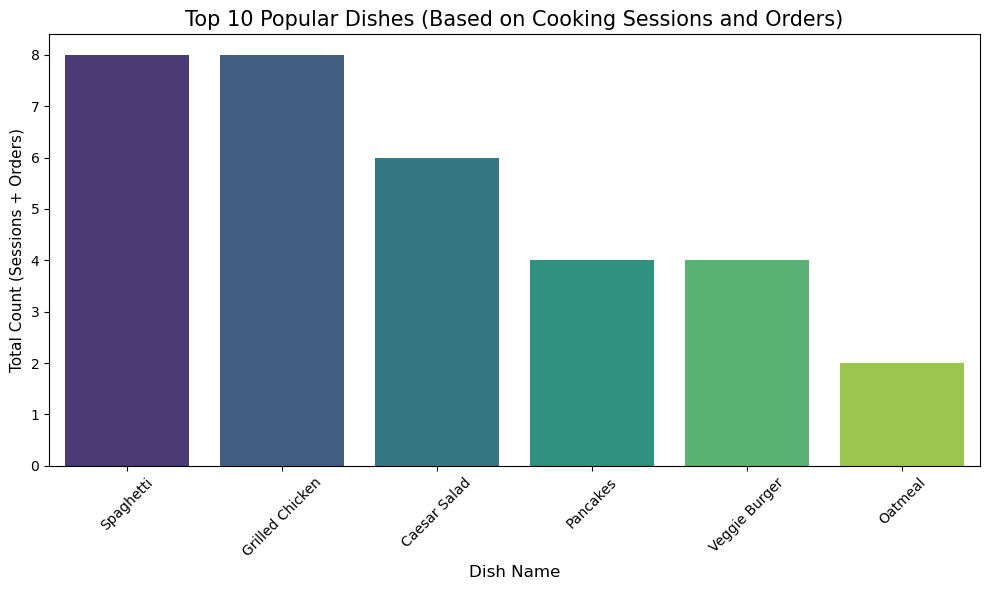

In [8]:
# Visualization: Popular dishes
plt.figure(figsize=(10, 6))
snb.barplot(data=popular_dishes_by_sort.head(10), x='Dish Name', y='Total Count', palette='viridis')
plt.title('Top 10 Popular Dishes (Based on Cooking Sessions and Orders)', fontsize=15)
plt.xlabel('Dish Name', fontsize=12)
plt.ylabel('Total Count (Sessions + Orders)', fontsize=11)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

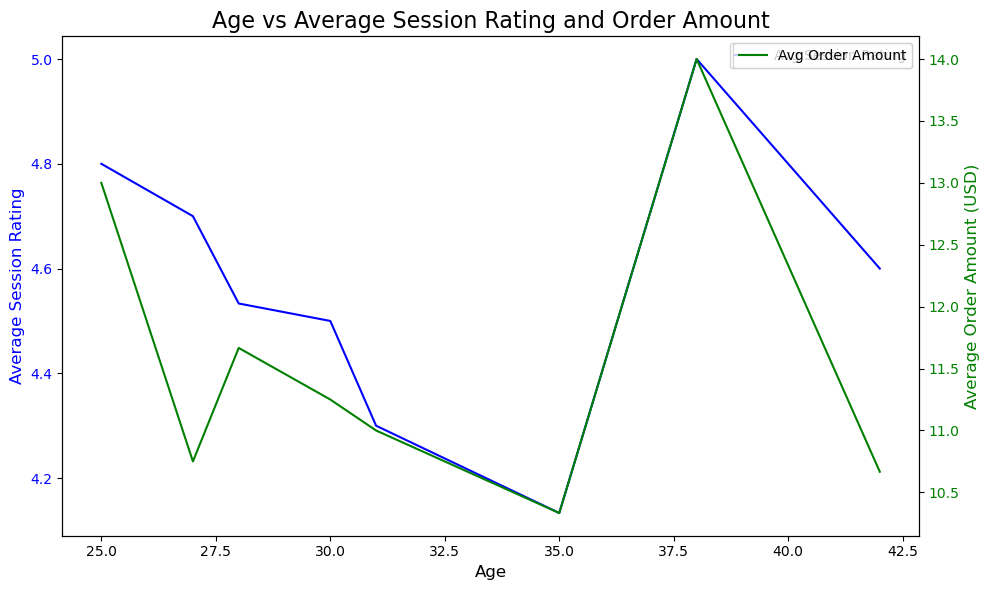

In [9]:
# Visualization: Age vs Behavior
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

snb.lineplot(data=age_analysis_by_sort, x='Age', y='avg_session_rating', ax=ax1, color='b', label='Avg Session Rating')
ax1.set_xlabel('Age', fontsize=12)
ax1.set_ylabel('Average Session Rating', fontsize=12, color='b')
ax1.tick_params(axis='y', labelcolor='b')

snb.lineplot(data=age_analysis_by_sort, x='Age', y='avg_order_amount', ax=ax2, color='g', label='Avg Order Amount')
ax2.set_ylabel('Average Order Amount (USD)', fontsize=12, color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Age vs Average Session Rating and Order Amount', fontsize=16)
plt.tight_layout()
plt.show()